#Interactive Plots

The `cytoflow` package is designed for both scripting and interactive use.  As much as I would like the whole world to use data-driven gating and analysis methods, many workflows still require manually specifying gates, and this is most easily done by drawing the gate on a plot.

Fortunately, through the combination of matplotlib and the Jupyter notebook, we can have the best of both worlds: interactive REPL *and* plots that we can point-and-click with.

Clearly, this is best run interactively; but if you're looking at this notebook online, you should still get a flavor of the package's capabilities.

----

First, set up `Jupyter`'s `matplotlib` support, and import the `cytoflow` module.

In [1]:
%matplotlib notebook

import cytoflow as flow

Load a few example files, conditioning them on a float variable `Dox`.

In [2]:
tube1 = flow.Tube(file='data/RFP_Well_A3.fcs', conditions = {"Dox" : 10.0})
tube2 = flow.Tube(file='data/CFP_Well_A4.fcs', conditions = {"Dox" : 1.0})

import_op = flow.ImportOp(conditions = {"Dox" : "log"},
                          tubes = [tube1, tube2])

ex = import_op.apply()

This will be easier on transformed data.

In [3]:
logicle = flow.LogicleTransformOp()
logicle.name = "Logicle transformation"
logicle.channels = ['V2-A', 'Y2-A', 'B1-A']
logicle.estimate(ex)
ex2 = logicle.apply(ex)

Plot the `Y2-A` channel.  We can see there's a bimodal distribution in one of the tubes.

<IPython.core.display.Javascript object>


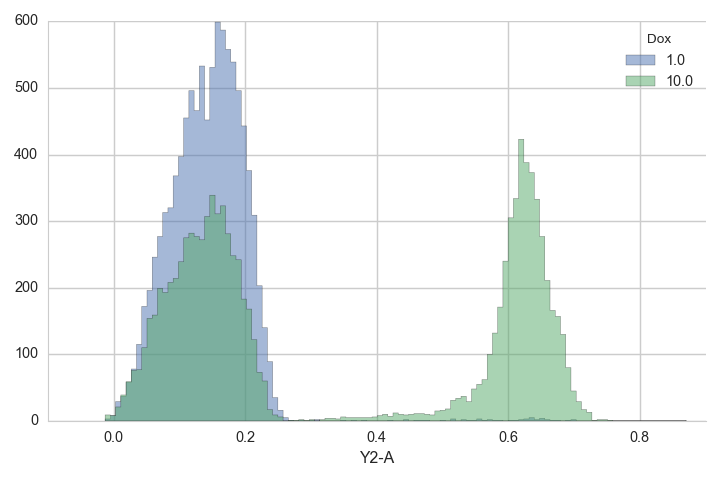

In [4]:
flow.HistogramView(name = "Histogram",
                   channel = "Y2-A",
                   huefacet = "Dox").plot(ex2)

Let's use a `ThresholdOp` to split out the top peak.  You can get an interactive plot (the same `HistogramView` as above) by calling `ThresholdOp`'s `default_view()` method.  The view that gets returned is linked back to the `ThresholdOp` that produced it: it shows the proper channel, and when you draw a threshold on it the `ThresholdOp` instance's `threshold` trait gets updated.

One other thing to note: because the `ThresholdOp`'s default view is derived from `HistogramView`, you can use all (well, most!) of the functionality in a regular `HistogramView`.  Here, we'll set the `huefacet` trait to plot the same multi-colored histogram as above.

As shown below, the steps for using an interactive view are:
* Instantiate the operation
* Call the operation's `default_view()` to get the interactive view.
* Plot the view.
* Set the view's `interactive` trait to `True`.  This step can go before or after calling `plot()`.
* Note that the view now shows a cursor (a vertical blue line) that follows your mouse as you move it around the view.  Select the threshold you want, then click the mouse button to set it.  A fixed blue line appears.

<IPython.core.display.Javascript object>


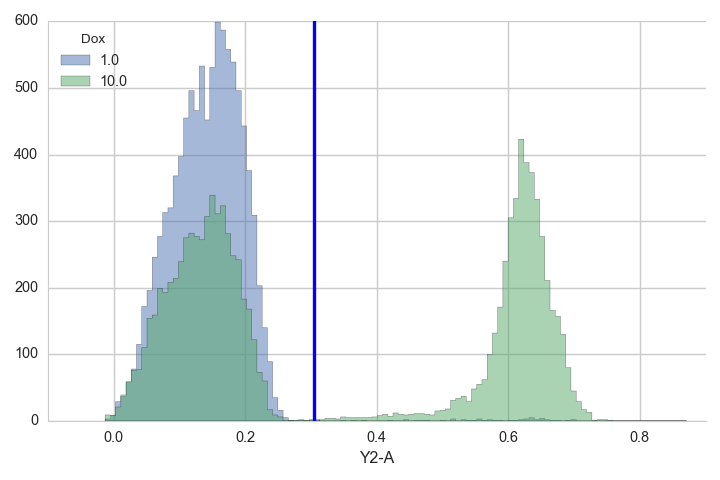

In [5]:
t = flow.ThresholdOp(name = "Threshold",
                     channel = "Y2-A")
tv = t.default_view()
tv.huefacet = "Dox"
tv.plot(ex2)
tv.interactive = True

After you've drawn a threshold on the plot, look at the `ThresholdOp` instance's `threshold` trait and see that it matches the threshold you drew.

In [6]:
print t.threshold

0.30457495503


You can then apply the newly parameterized operation to the data set.

<IPython.core.display.Javascript object>


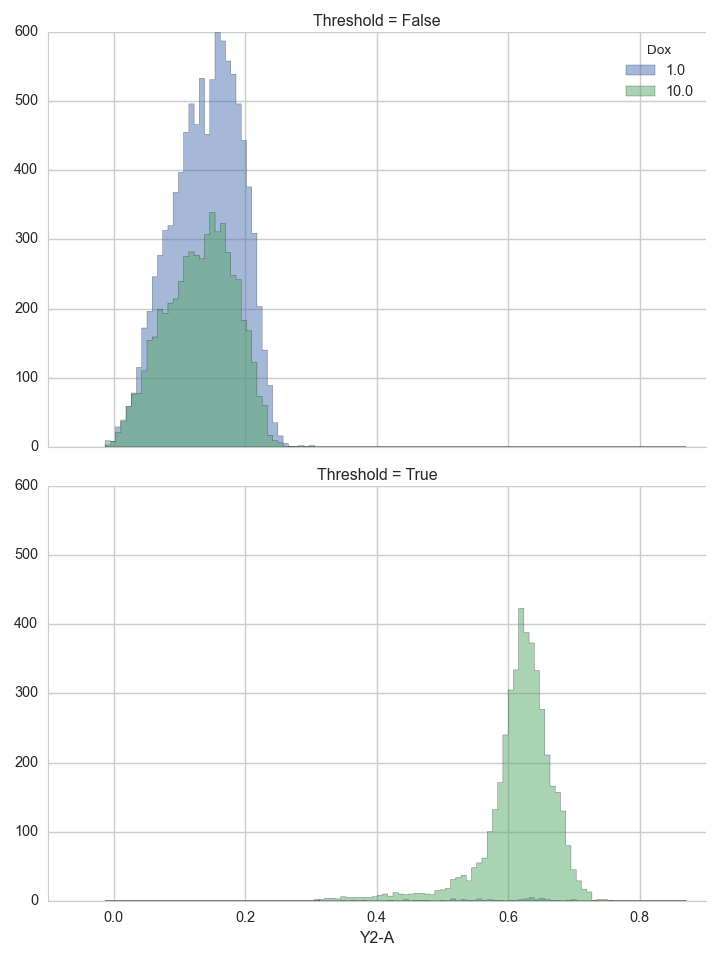

In [7]:
ex3 = t.apply(ex2)
flow.HistogramView(name = "Histogram",
                   channel = "Y2-A",
                   huefacet = "Dox",
                   yfacet = "Threshold").plot(ex3)

We can use a similar strategy with the `RangeOp`.  The setup is very much the same; but instead of a single click, drag the cursor to set the range.

<IPython.core.display.Javascript object>


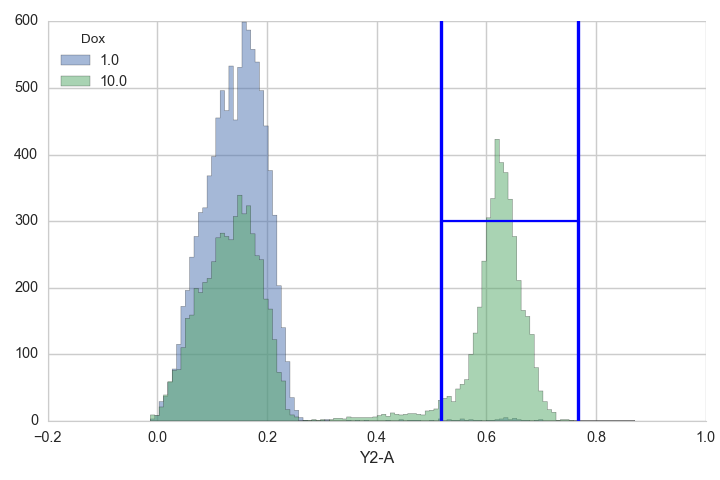

In [8]:
r = flow.RangeOp(name = "Range",
                 channel = "Y2-A")
rv = r.default_view()
rv.huefacet = "Dox"
rv.plot(ex2)
rv.interactive = True

In [9]:
print r.low, r.high

0.517393020919 0.766694183817


You can also draw ranges on 2D plots.  Again, drag the cursor to draw a range.

<IPython.core.display.Javascript object>


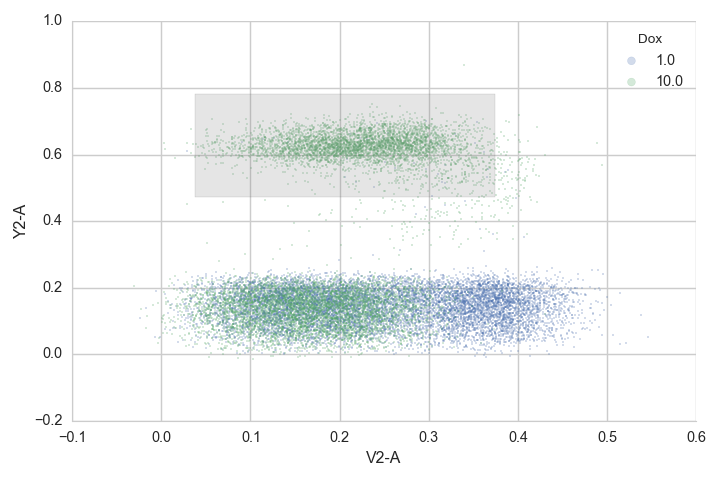

In [10]:
r2d = flow.Range2DOp(name = "Range2D",
                     xchannel = "V2-A",
                     ychannel = "Y2-A")
r2dv = r2d.default_view()
r2dv.huefacet = "Dox"
r2dv.plot(ex2)
r2dv.interactive = True

In [11]:
print r2d.xlow, r2d.xhigh, r2d.ylow, r2d.yhigh

0.0378574634548 0.374234766663 0.471317578842 0.780678499917


Finally, you can specify a polygon this way too.  Unforunately, the JavaScript link between the Jupyter notebook and the Python kernel is a little slow, so the performance here is ... not ideal.

Single click to set vertices; double-click when you're done.

<IPython.core.display.Javascript object>


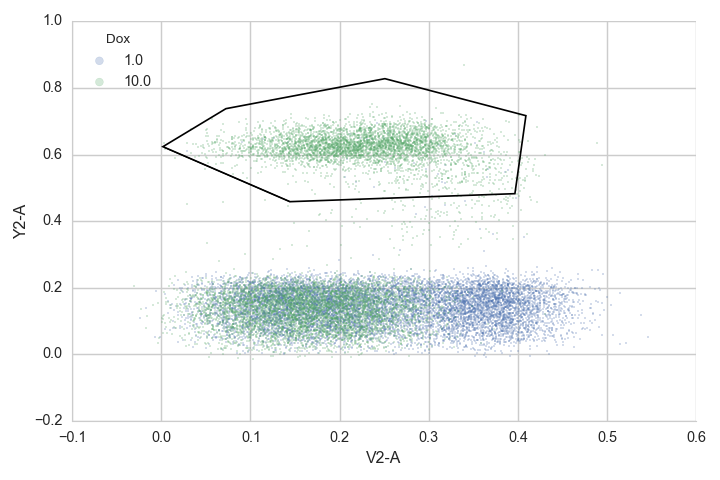

In [12]:
p = flow.PolygonOp(name = "Polygon",
                   xchannel = "V2-A",
                   ychannel = "Y2-A")
pv = p.default_view()
pv.huefacet = "Dox"
pv.plot(ex2)
pv.interactive = True

In [13]:
print p.vertices

[(0.072616451453046599, 0.73787856666110485), (0.25089642215351571, 0.82798368930418842), (0.40899375466147891, 0.71685403804438519), (0.39665992021050311, 0.48258071917236789), (0.14437694280417881, 0.45855268646754554), (0.0019772177792758139, 0.62374541131319894)]
